In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
raw_data = pd.read_csv('Classified Data',index_col=0)
raw_data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
raw_data.isnull().sum() ## No missing values

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [7]:
## Standraizing the variables 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
data = raw_data.copy()
inputs = data.drop(['TARGET CLASS'],axis=1)
target = data['TARGET CLASS']
inputs.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [10]:
input_scaled = scaler.fit_transform(inputs)
input_scaled = pd.DataFrame(input_scaled,columns=inputs.columns)
input_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [11]:
target.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [12]:
## Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(input_scaled,target,test_size=0.2,random_state = 365)
x_train.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
908,0.903449,0.004247,-1.019720,-0.210551,-1.758523,-0.670239,0.198761,-0.345491,-0.098855,1.192704
591,1.096026,-0.394410,-0.867782,-0.706283,0.090662,0.448543,-1.080369,-0.375873,0.781707,0.756101
836,-0.207912,-0.220814,-0.968682,-1.148471,-1.372784,0.840106,-0.016545,-1.743240,-0.487064,0.063886
145,-0.996586,0.980226,0.648594,-0.907197,-0.747808,-0.183377,-0.974392,1.756363,-0.705747,-1.058587
606,-0.405906,-0.803625,-1.398796,-0.292131,0.857400,0.629749,0.477236,-1.116454,0.084756,0.966854


In [13]:
## KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)

In [14]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
ypred = classifier.predict(x_test)

## Evaluation of KNN Model

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
cm = pd.DataFrame(confusion_matrix(y_test,ypred),columns=['Predicted 1','Predicted 0'],index =['Actual 1','Actual 0'])
cm

,Predicted 1,Predicted 0
Actual 1,85,11
Actual 0,9,95


In [21]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89        96
           1       0.90      0.91      0.90       104

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [28]:
accuracy = round(accuracy_score(y_test,ypred)*100,3)
accuracy

90.0

## Selecting the right K-Value

In [23]:
error_rate = []
for i in range(1,30):
    classifier = classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train,y_train)
    i_pred = classifier.predict(x_test)
    error_rate.append(np.mean(i_pred != y_test ))

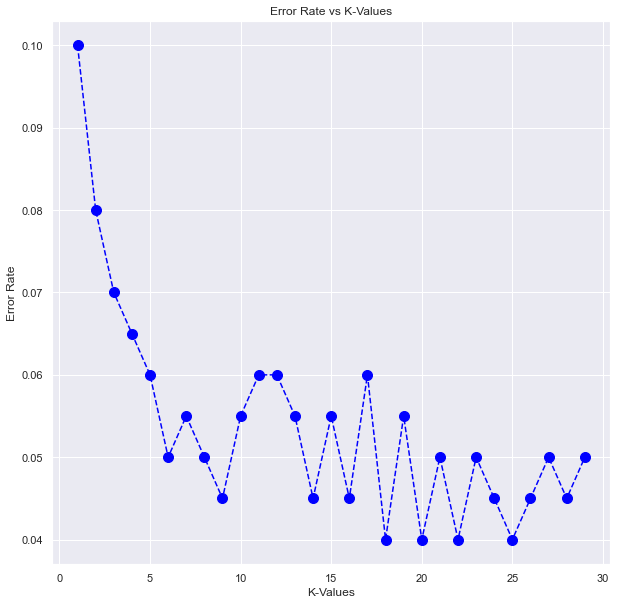

In [24]:
plt.figure(figsize=(10,10))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed',marker='o',markersize=10)
plt.xlabel("K-Values")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K-Values")
plt.show()

From the graph above we can see that when K >17 the error rate is low. So we can pick a k-value from the graph

In [25]:
## With K Value = 23
classifier = KNeighborsClassifier(n_neighbors=23)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
cm = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted 1','Predicted 0'],index =['Actual 1','Actual 0'])
cm

,Predicted 1,Predicted 0
Actual 1,90,6
Actual 0,4,100


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        96
           1       0.94      0.96      0.95       104

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [30]:
accuracy = round(accuracy_score(y_test,y_pred)*100,3)
accuracy

95.0

We can see that when k is 23 the accuracy is better when compared to k = 1. Not only accuracy, even other performance metrics like precision and recall is better.